<a href="https://colab.research.google.com/github/aquapathos/MLLesson/blob/master/Google_Colab_In_GUI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sudo 用のユーザの作成
sudo用のユーザ名とパスワードを決めてください



In [ ]:
#@title **STEP 1 Linux ユーザの設定**
 
import os
print("ユーザ作成")

username = "user" #@param {type:"string"}
password = "passwd" #@param {type:"string"}
  
# Creation of user
os.system(f"useradd -m {username}")
 
# Add user to sudo group
os.system(f"adduser {username} sudo")
    
# Set password of user to 'root'
os.system(f"echo '{username}:{password}' | sudo chpasswd")
 
# Change default shell from sh to bash
os.system("sed -i 's/\/bin\/sh/\/bin\/bash/g' /etc/passwd")
 
print("作成完了")

ユーザ作成
作成完了


In [ ]:
#@title **STEP2 インストール項目の選択**
リモートデスクトップ = True #@param {type:"boolean"}
デスクトップ環境 = True #@param {type:"boolean"}
Chromeブラウザ = True #@param {type:"boolean"}
VSCode = True #@param {type:"boolean"}
UnityHub = True #@param {type:"boolean"}
#@markdown  インストールしたい項目にチェックを入れてください


In [ ]:
#@title **STEP3 デスクトップ環境のインストール**
 
import os
import subprocess
 
#@markdown まず、 http://remotedesktop.google.com/headless に行き、Debian Linux用のコードをコピーし、CRP欄にペーストしてください。
 
CRP = "DISPLAY= /opt/google/chrome-remote-desktop/start-host --code=\"4/0AdQt8qj5OwctCZ1JJ91Ww3KNv_5dZZ7JBRvYzN8a0oOkb4P5uyHsA6tA-wAPUfSdXGFodQ\" --redirect-url=\"https://remotedesktop.google.com/_/oauthredirect\" --name=$(hostname)" #@param {type:"string"}

#@markdown 次に、整数６つ以上のPinコードを決めてください。
#@markdown このコードはリモートデスクトップのアクセスに使います。
Pin =  88883333#@param {type: "integer"}
 
class CRD:
    def __init__(self):
        os.system("apt update")
        if リモートデスクトップ:
          self.installCRD()
        if デスクトップ環境:
          self.installDesktopEnvironment()
        if Chromeブラウザ:
          self.installGoogleChorme()
        if VSCode:
          self.installVSCode()
        if UnityHub:
          self.downloadUnityHub()
        self.finish()
 
    @staticmethod
    def installCRD():
        print("Chrome Remote Desktopのインストール")
        subprocess.run(['wget', 'https://dl.google.com/linux/direct/chrome-remote-desktop_current_amd64.deb'], stdout=subprocess.PIPE)
        subprocess.run(['dpkg', '--install', 'chrome-remote-desktop_current_amd64.deb'], stdout=subprocess.PIPE)
        subprocess.run(['apt', 'install', '--assume-yes', '--fix-broken'], stdout=subprocess.PIPE)
 
    @staticmethod
    def installDesktopEnvironment():
        print("デスクトップ環境のインストール")
        os.system("export DEBIAN_FRONTEND=noninteractive")
        os.system("apt install --assume-yes xfce4 desktop-base xfce4-terminal")
        os.system("bash -c 'echo \"exec /etc/X11/Xsession /usr/bin/xfce4-session\" > /etc/chrome-remote-desktop-session'")
        os.system("apt remove --assume-yes gnome-terminal")
        os.system("apt install --assume-yes xscreensaver")
        os.system("systemctl disable lightdm.service")
 
    @staticmethod
    def installGoogleChorme():
        print("Google Chromeのインストール")
        subprocess.run(["wget", "https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb"], stdout=subprocess.PIPE)
        subprocess.run(["dpkg", "--install", "google-chrome-stable_current_amd64.deb"], stdout=subprocess.PIPE)
        subprocess.run(['apt', 'install', '--assume-yes', '--fix-broken'], stdout=subprocess.PIPE)

    @staticmethod
    def downloadUnityHub():
        print("UnityHubのダウンロード")
        subprocess.run(["wget", "https://public-cdn.cloud.unity3d.com/hub/prod/UnityHub.AppImage"])
        subprocess.run(["chmod","+x","UnityHub.AppImage"])
        subprocess.run(["mv","UnityHub.AppImage",f"/home/{username}"])
        print("Unity Hub をインストールする場合は、./UnityHub.AppImage を実行してください")

    @staticmethod
    def installVSCode():
        print("Visual Studio Codeのインストール")
        subprocess.run(["curl","-L","https://go.microsoft.com/fwlink/?LinkID=760868","-o","vscode.deb>"])
        subprocess.run(["apt","install", "-y", "./vscode.deb"])
        print("Installing IPA Font")
        subprocess.run(["apt","install","-y","fonts-ipafont"])
        print("Installing PySimpleGUI")
        subprocess.run(["pip","install","-q","pysimplegui"])

    @staticmethod
    def finish():
        print("もうすぐ終わります")
        os.system(f"adduser {username} chrome-remote-desktop")
        command = f"{CRP} --pin={Pin}"
        os.system(f"su - {username} -c '{command}'")
        os.system("service chrome-remote-desktop start")
        print("インストール完了")

try:
    if username:
        if CRP == "":
            print("Please enter authcode from the given link")
        elif len(str(Pin)) < 6:
            print("Enter a pin more or equal to 6 digits")
        else:
            CRD()
except NameError as e:
    print("username variable not found")
    print("Create a User First")

Chrome Remote Desktopのインストール
デスクトップ環境のインストール
Google Chromeのインストール
Visual Studio Codeのインストール
Installing IPA Font
Installing PySimpleGUI
UnityHubのダウンロード
user
Unity Hub をインストールする場合は、./UnityHub.AppImage を実行してください
もうすぐ終わります
インストール完了


[http://remotedesktop.google.com/access](http://remotedesktop.google.com/access)にアクセス
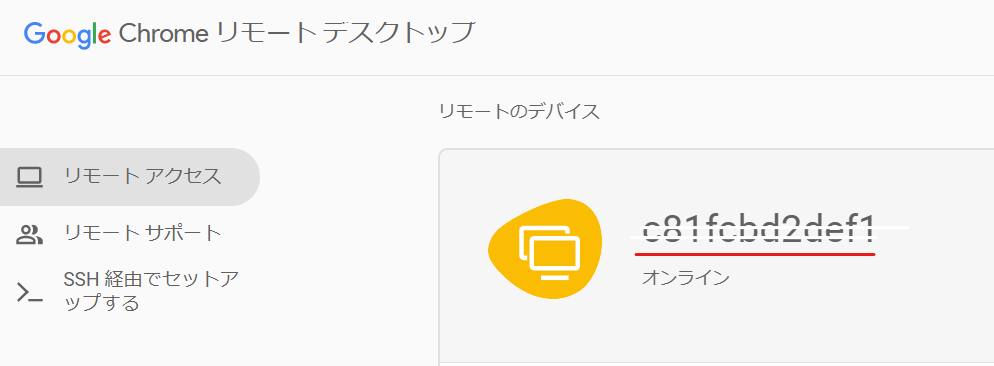